In [1]:
from budyko import curves as bc
import statsmodels.formula.api as smf
import matplotlib as mpl
import statsmodels.api as sm
from palettable.colorbrewer.qualitative import Paired_10 as cbcust
regcs = [2,3,1,4,9,7,10,8,5,6] # 
cbcust2 = []
for rc in regcs:
    cbcust2.append(cbcust.mpl_colors[rc-1])
    
# x = x values
# x0 = x threshold value p[0]
# y0 = y threshold value p[1]
# k1 = slope for first section p[2]
# k2 = slope for second section p[3]
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

from scipy import optimize

In [2]:
regs = [1,2,3,4,6,7,8,9,12,13] # region codes
regions = ['Cascades','East Cascades','North Cascades','Sierra','Northern Rockies','Middle Rockies',
           'Canadian Rockies','Idaho Batholith','Wasatch',
           'Southern Rockies']

tmp = pd.read_hdf('./budyko_working_er_all.hdf','df')

In [3]:
data = tmp[(tmp["rc"]==1) | (tmp["rc"]==2) | (tmp["rc"]==3) | (tmp["rc"]==4) | (tmp["rc"]==6) | (tmp["rc"]==7) | (tmp["rc"]==8) | (tmp["rc"]==9) | (tmp["rc"]==12) | (tmp["rc"]==13)]

In [4]:
for c in data.columns:
    print c

frlon
PETpenmanvic
P
ET
frlat
Sf
meanablseason
meandosnowfree
meanpeakswe
meanpeaket
meandopeaket
lon_x
meanablslope
lat_x
meandopeakswe
infilt
fs_active
l1_quartz
l3_Wpwp_FRACT
l3_bulkD
l3_init_moist
annual_prec
l2_soil_density
l2_Ksat
rough
l2_Wcr_FRACT
l2_depth
l2_quartz
l1_phi_s
l3_bubble
l1_expt
Ws
l1_Ksat
l1_soil_density
l1_resid_moisture
l2_phi_s
l2_init_moist
l2_expt
l1_init_moist
l1_depth
off_gmt
l3_expt
l3_depth
Dsmax
l1_Wpwp_FRACT
l3_resid_moisture
avg_T
l3_soil_density
l3_phi_s
dp
c
l2_bulkD
l2_bubble
l2_Wpwp_FRACT
l3_Ksat
l3_quartz
Ds
l1_bulkD
l1_bubble
l2_resid_moisture
elev
snow_rough
l1_Wcr_FRACT
l3_Wcr_FRACT
slope
rsquared_adj
intercept
rsquared
pvalue
w_flux
w_flux2
w_flux3
snowmelt
Sf2
Sf1
Sf_2
Sf_1
wflux4
wflux5
rain
netSM
seas
MAT
RR_pval
RR_intercept
RR_slope
RR_rsqrd
bf
sm3
sm2
sm1
prate
rr
Tmean
idx
spaidx
lat_y
lon_y
DEMelev
idx2
rc


In [5]:
d = data[['PETpenmanvic','P','ET','snowmelt','bf','rc','rr']].copy()

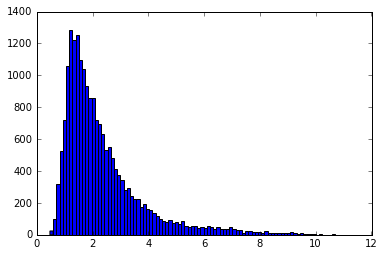

In [29]:
plt.hist(d.P.as_matrix(),100);

In [6]:
d['ET_P'] = d['ET']/d["P"]

In [7]:
d['PET_P'] = d['PETpenmanvic']/d['P']

In [8]:
X = np.array([d.P,d.PETpenmanvic]) # split out PET and P for parameter estimation

In [9]:
y = d.ET_P.as_matrix()

In [10]:
PET = np.linspace(0.00001,20,10000) # generate a sequence of PET and P to plot the budyko curves
P = np.linspace(1,2,10000)

In [11]:
X2 = np.array([P,PET])

In [12]:
curves = pd.DataFrame({'PET':PET,'P':P})
curves['PET_P'] = curves['PET']/curves['P']

In [13]:
n = bc.fit_mcy(X,y)
omega = bc.fit_fuzhang(X,y)
w = bc.fit_zhang(X,y)
k = bc.fit_zhou(X,y)

In [14]:
curves['schreiber'] = bc.schreiber(X2)
curves['oldekop'] = bc.oldekop(X2)
curves['turc_pike'] = bc.turc_pike(X2)
curves['budyko'] = bc.budyko(X2)
curves['myc'] = bc.mcy(X2,n)
curves['fuzhang'] = bc.fuzhang(X2,omega)
curves['zhang'] = bc.zhang(X2,w)
curves['sharif'] = bc.sharif(X2)
curves['zhou'] = bc.zhou(X2,k)

(0, 4)

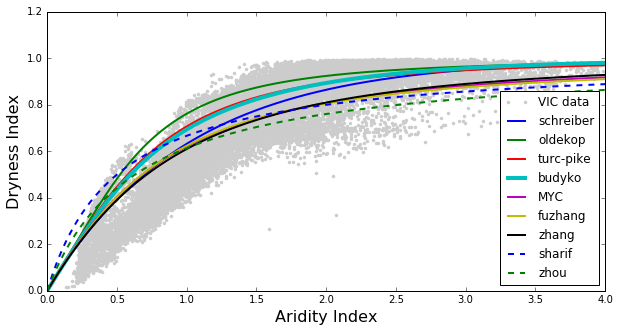

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.plot(d.PETpenmanvic/d.P,d.ET_P,'.',c='0.8',label='VIC data')

ax.plot(curves.PET_P,curves.schreiber,'-',label='schreiber',lw=2)
ax.plot(curves.PET_P,curves.oldekop,'-',label='oldekop',lw=2)
ax.plot(curves.PET_P,curves.turc_pike,'-',label='turc-pike',lw=2)
ax.plot(curves.PET_P,curves.budyko,'-',label='budyko',lw=4)
ax.plot(curves.PET_P,curves.myc,'-',label='MYC',lw=2)
ax.plot(curves.PET_P,curves.fuzhang,'-',label='fuzhang',lw=2)
ax.plot(curves.PET_P,curves.zhang,'-',label='zhang',lw=2)
ax.plot(curves.PET_P,curves.sharif,'--',label='sharif',lw=2)
ax.plot(curves.PET_P,curves.zhou,'--',label='zhou',lw=2)

ax.legend(loc ='lower right')
ax.set_xlabel('Aridity Index', fontsize = 16)
ax.set_ylabel('Dryness Index', fontsize = 16)

ax.set_ylim(0,1.2)
ax.set_xlim(0,4)

In [16]:
mean_bc = curves.schreiber.as_matrix()+curves.oldekop.as_matrix()+curves.turc_pike.as_matrix()+curves.budyko.as_matrix()+curves.myc.as_matrix()+curves.fuzhang.as_matrix()+curves.zhang.as_matrix()+curves.sharif.as_matrix()+curves.zhou.as_matrix()
mean_bc /= 9

In [17]:
np.percentile(mean_bc,0.95)

0.19489529557809926

In [18]:
# calculate estimates of ET/P for each cell for each equation
d['schreiber'] = bc.schreiber(X)
d['oldekop'] = bc.oldekop(X)
d['turc_pike'] = bc.turc_pike(X)
d['budyko'] = bc.budyko(X)
d['myc'] = bc.mcy(X,n)
d['fuzhang'] = bc.fuzhang(X,omega)
d['zhang'] = bc.zhang(X,w)
d['sharif'] = bc.sharif(X)
d['zhou'] = bc.zhou(X,k)

In [19]:
# compute residuals
d['schreiber_resid'] = d.ET_P - d.schreiber
d['oldekop_resid'] = d.ET_P - d.oldekop
d['turc_pike_resid'] = d.ET_P - d.turc_pike
d['budyko_resid'] = d.ET_P - d.budyko
d['myc_resid'] = d.ET_P - d.myc
d['fuzhang_resid'] = d.ET_P - d.fuzhang
d['zhang_resid'] = d.ET_P - d.zhang
d['sharif_resid'] = d.ET_P - d.sharif
d['zhou_resid'] = d.ET_P - d.zhou

In [20]:
ET_P_bar = d.ET_P.mean()
SST = np.sum(np.square(d.ET_P-ET_P_bar))

methods = ['schreiber','oldekop','turc_pike','budyko','myc','fuzhang','zhang','sharif','zhou']
resids = ['schreiber_resid','oldekop_resid','turc_pike_resid','budyko_resid','myc_resid','fuzhang_resid','zhang_resid',
          'sharif_resid','zhou_resid']
obfx = pd.DataFrame({'curve_r2':np.zeros(len(methods))},index=methods)
obfx['curve_rmse'] = np.nan
for m,r in zip(methods,resids):
    SSRes = np.sum(np.square(d[r]))
    obfx.loc[m,'curve_r2'] = 1-(SSRes/SST)
    obfx.loc[m,'curve_rmse'] = np.sqrt(np.sum(np.square(d[r]))/len(d[r]))

In [21]:
# compute anomalies
anom = ['schreiber_anom','oldekop_anom','turc_pike_anom','budyko_anom','myc_anom','fuzhang_anom','zhang_anom',
          'sharif_anom','zhou_anom']
for m,a in zip(methods,anom):
    d[a] = (1-d['ET_P'])-(1-d[m])
    

In [22]:
mean_anom = d.schreiber_anom.as_matrix()+d.oldekop_anom.as_matrix()+d.turc_pike_anom.as_matrix()+d.budyko_anom.as_matrix()+\
d.myc_anom.as_matrix()+d.fuzhang_anom.as_matrix()+d.zhang_anom.as_matrix()+d.sharif_anom.as_matrix()+d.zhou_anom.as_matrix()
mean_anom /= 9

In [23]:
# test a piecewise regression
X = np.linspace(tmp.snowmelt.min(),tmp.snowmelt.max(),500)
yy = piecewise_linear(X,*p)
plt.plot(tmp.snowmelt,tmp.mean_anom,'.k',alpha = 0.05)

plt.plot(X,yy,'-r')
#plt.plot(tmp.snowmelt,mod.fittedvalues,'.r')
plt.axvline(p[0],c='g')
plt.axhline(p[1],c='b')

tx = np.arange(0,25,1)
plt.plot(tx,tx*p[2],'-c')
plt.plot(tx,tx*p[3],'-c')

NameError: name 'p' is not defined

In [24]:
# Examine residuals
plt.plot(tmp.snowmelt,y-piecewise_linear(tmp.snowmelt.as_matrix(),*p),'.')
plt.axhline(0,c='k')
plt.xlim(0,22)
plt.ylim(-0.5,0.5)

NameError: name 'p' is not defined

In [25]:
# fit piecewise regression for all methods
obfx2 = pd.DataFrame()
for m,a in zip(methods,anom):
    p,e = optimize.curve_fit(piecewise_linear,d.snowmelt.as_matrix(),d[a].as_matrix())
    
    if (p[0]<0) or (p[0]>d.snowmelt.max()): # if the break is negative, fit one linear regression
        X = d.snowmelt.as_matrix()
        X = sm.add_constant(X)
        y = d[a].as_matrix()
        m1 = sm.OLS(y,X).fit()
        obfx2.loc[m,'breakx'] = np.NaN
        obfx2.loc[m,'breaky'] = np.NaN
        obfx2.loc[m,'b1'] = m1.params[1]
        obfx2.loc[m,'b2'] = np.NaN
        obfx2.loc[m,'r2'] = m1.rsquared
        obfx2.loc[m,'s1'] = 1.
        obfx2.loc[m,'s2'] = np.NaN
        continue
        
    obfx2.loc[m,'breakx'] = p[0]
    obfx2.loc[m,'breaky'] = p[1]
    obfx2.loc[m,'b1'] = p[2]
    obfx2.loc[m,'b2'] = p[3]
    
    SST = np.sum(np.square(d[a]-d[a].mean())) # compute SST
    
    # calculate r2
    yy = piecewise_linear(d.snowmelt.as_matrix(),*p)
    resid = d[a].as_matrix()-yy
    
    SSRes = np.sum(np.square(resid))
    obfx2.loc[m,'r2'] = 1-(SSRes/SST)
    obfx2.loc[m,'rmse'] = np.sqrt(np.sum(np.square(resid))/len(resid))
    
    X = d.snowmelt.as_matrix()
        
    obfx2.loc[m,'s1'] = len(X[X<p[0]])/float(len(X))
    obfx2.loc[m,'s2'] = len(X[X>=p[0]])/float(len(X))
    print 'Fitting '+a

Fitting schreiber_anom
Fitting oldekop_anom
Fitting turc_pike_anom
Fitting budyko_anom
Fitting fuzhang_anom
Fitting zhang_anom
Fitting sharif_anom
Fitting zhou_anom


/Users/barnhatb/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [26]:
# fit baseflow efficiency streamflow anomaly curves
# but in obfx2 data frame with the piecewise regressions
d['bf_P'] = d.bf/d.P
for m,a in zip(methods,anom):
    m1 = sm.formula.ols(a+' ~ bf_P +1',d).fit()
    obfx2.loc[m,'slope_bf_P'] = m1.params['bf_P']
    obfx2.loc[m,'intercept_bf_P'] = m1.params['Intercept']
    obfx2.loc[m,'lin_r2_bf_P'] = m1.rsquared
    obfx2.loc[m,'lin_pval_bf_P'] = m1.f_pvalue

In [27]:
d.rr

0      2.317366
1      2.300832
2      2.476741
3      2.629906
4      2.320753
5      2.486159
6      2.514384
7      2.456168
8      2.495076
9      2.504043
10     2.379419
11     2.452743
12     2.616761
13     2.459760
14     2.366754
15     2.702726
16     2.556492
17     2.093205
18     2.426181
19     2.402855
20     2.390473
21     2.712428
22     2.639729
23     2.415373
24     2.407840
25     2.481266
26     2.647131
27     2.410066
28     2.240955
29     2.054088
         ...   
871    3.956198
872    2.920380
873    2.341584
874    2.198771
875    2.138039
876    2.131060
877    1.995772
878    2.179457
879    2.263191
880    2.703246
881    3.073958
882    4.081568
883    3.949136
884    4.017766
885    3.895282
886    4.367691
887    5.063093
888    4.412128
889    4.757856
890    4.981433
891    4.290989
892    4.638658
893    4.950250
894    5.068653
895    5.510510
896    5.890827
897    6.484263
898    6.406709
899    6.063589
900    5.561098
Name: rr, dtype: float64

In [ ]:
d['runoff'] = d.rr

In [78]:
#obfx.to_excel('./figures/fit_curves_table.xlsx')

In [114]:
obfx2

,breakx,breaky,b1,b2,r2,rmse,s1,s2,slope_bf_P,intercept_bf_P,lin_r2_bf_P,lin_pval_bf_P
schreiber,10.726300,0.149023,0.017217,0.001319,0.278436,0.079904,0.950108,0.049892,0.422414,-0.049480,0.451128,0
oldekop,5.106147,0.189552,0.041618,0.006192,0.438083,0.081845,0.672722,0.327278,0.552679,0.010242,0.573219,0
turc_pike,7.141202,0.176485,0.028359,0.003493,0.396702,0.079846,0.817295,0.182705,0.516802,-0.020866,0.565407,0
budyko,5.533111,0.130031,0.028725,0.008489,0.353205,0.080090,0.709853,0.290147,0.482380,-0.020177,0.524903,0
myc,NaN,NaN,0.022212,NaN,0.441930,NaN,1.000000,NaN,0.577706,-0.112208,0.661443,0
fuzhang,8.799675,0.135857,0.027755,0.004634,0.474638,0.077567,0.892108,0.107892,0.585351,-0.113799,0.669316,0
zhang,9.422729,0.127869,0.024083,0.004746,0.421537,0.078035,0.915728,0.084272,0.538258,-0.108752,0.615707,0
sharif,8.595562,0.208647,0.039713,0.009194,0.651786,0.077135,0.883651,0.116349,0.803078,-0.133316,0.844397,0
zhou,8.905091,0.157804,0.036379,0.008974,0.622137,0.076968,0.896062,0.103938,0.757851,-0.170253,0.819548,0


In [172]:
# fit piecewise regression to ecoregion
#cols = ["rc","zhang_r2","schreiber_r2","oldekop_r2","turc_pike_r2","budyko_r2","mcy_r2","fuzhang_r2",
#        "sharif_r2","zhou_r2","mcy","fuzhang","zhang","zhou","zhang_asmpt","schreiber_asmpt",
#        "oldekop_asmpt","turc_pike_asmpt","budyko_asmpt","mcy_asmpt","fuzhang_asmpt","sharif_asmpt",
#        "zhou_asmpt","mean_sm","zhang_b1","schreiber_b1","oldekop_b1","turc_pike_b1","budyko_b1",
#        "mcy_b1","fuzhang_b1","sharif_b1","zhou_b1","zhang_b2","schreiber_b2","oldekop_b2",
#        "turc_pike_b2","budyko_b2",
#        "mcy_b2","fuzhang_b2","sharif_b2","zhou_b2","zhang_p","schreiber_p","oldekop_p",
#        "turc_pike_p","budyko_p","mcy_p","fuzhang_p","sharif_p","zhou_p","zhang_int","schreiber_int",
#        "oldekop_int","turc_pike_int","budyko_int","mcy_int","fuzhang_int","sharif_int","zhou_int"]
#er_fits = pd.DataFrame(columns=cols)
#er_fits['rc'] = regs

er_fits = pd.DataFrame() # generate data frame for results
er_fits['rc'] = regs # add the region codes

for er in regs: # loop through each ecoregion
    
    
    for m in methods: # loop through each method
        X = d.loc[d.rc==er,'snowmelt'].as_matrix() # grab snowmelt for the ecoregion
        y = d.loc[d.rc==er,m+'_anom'].as_matrix() # pull out y values
        SST = np.sum(np.square(y-np.mean(y))) # compute SST
        p,e = optimize.curve_fit(piecewise_linear,X,y) # fit piecewise regression
        
        if (p[0]<0) or (p[0]>d.snowmelt.max()): # if breakpoint is negative then fit a single regression
            X = sm.add_constant(X) # add constant to X values
            mod = sm.OLS(y,X).fit()
            er_fits.loc[er_fits.rc==er,m+'_r2'] = mod.rsquared
            er_fits.loc[er_fits.rc==er,m+'_b1'] = mod.params[1]
            er_fits.loc[er_fits.rc==er,m+'_int'] = mod.params[0]
            
            er_fits.loc[er_fits.rc==er,m+'_b2'] = np.NaN
            er_fits.loc[er_fits.rc==er,m+'_breakx'] = np.NaN
            er_fits.loc[er_fits.rc==er,m+'_breaky'] = np.NaN
            er_fits.loc[er_fits.rc==er,m+'_s1'] = np.NaN
            er_fits.loc[er_fits.rc==er,m+'_s2'] = np.NaN
            er_fits.loc[er_fits.rc==er,m+'_test'] = np.NaN
            continue
    
            
        yy = piecewise_linear(X,*p) # calculate fitted values
        resid = y-yy # compute residuals
        SSRes = np.sum(np.square(resid))
        er_fits.loc[er_fits.rc==er,m+'_r2'] = 1-(SSRes/SST) # compute r2
        #er_fits.loc[er_fits.rc==er,m+'_rmse'] = np.sqrt(np.sum(np.square(resid))/len(resid)) # compute rmse
        er_fits.loc[er_fits.rc==er,m+'_b1'] = p[2]
        er_fits.loc[er_fits.rc==er,m+'_b2'] = p[3]
        er_fits.loc[er_fits.rc==er,m+'_breakx'] = p[0]
        er_fits.loc[er_fits.rc==er,m+'_breaky'] = p[1]
        s1 = len(X[X<p[0]])/float(len(X)) # percent of cells in each segment
        s2 = len(X[X>=P[0]])/float(len(X))
        er_fits.loc[er_fits.rc==er,m+'_int'] = np.NaN

        er_fits.loc[er_fits.rc==er,m+'_s1'] = s1
        er_fits.loc[er_fits.rc==er,m+'_s2'] = s2
        er_fits.loc[er_fits.rc==er,m+'_test'] = s1+s2
    
        #print str(er)+' '+str(m)

In [173]:
er_fits

,rc,schreiber_r2,schreiber_b1,schreiber_int,schreiber_b2,schreiber_breakx,schreiber_breaky,schreiber_s1,schreiber_s2,schreiber_test,...,sharif_test,zhou_r2,zhou_b1,zhou_int,zhou_b2,zhou_breakx,zhou_breaky,zhou_s1,zhou_s2,zhou_test
0,1,0.733359,0.020735,-0.136140,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.812094,0.022254,-0.104429,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.011062,0.003711,0.046057,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.273722,0.015974,NaN,0.026100,4.837534,-0.008969,0.758207,0.989268,1.747475
2,3,0.079331,0.005045,0.074671,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.559902,0.014027,0.012602,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.406836,0.018787,NaN,0.004231,6.725385,0.165879,0.691039,0.999283,1.690323,...,1.704659,0.582443,0.025574,-0.035112,NaN,NaN,NaN,NaN,NaN,NaN
4,6,0.000204,0.000423,0.059124,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.250641,0.078210,NaN,0.014708,0.774014,-0.044741,0.000000,0.999210,0.999210
5,7,0.322946,0.027206,-0.066803,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.585190,-0.067793,NaN,0.047418,0.984553,-0.152100,0.132445,0.862141,0.994586
6,8,0.479050,0.016877,-0.031500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.656714,0.027669,-0.097527,NaN,NaN,NaN,NaN,NaN,NaN
7,9,0.386661,0.024843,-0.080062,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.620219,0.039664,-0.201703,NaN,NaN,NaN,NaN,NaN,NaN
8,12,0.338892,-0.041195,NaN,0.031177,2.451304,-0.029897,0.438525,0.948361,1.386885,...,NaN,0.570095,-0.034249,NaN,0.050020,2.217101,-0.130493,0.358197,0.948361,1.306557
9,13,0.496884,-0.064562,NaN,0.046170,1.801642,-0.069587,0.425427,0.929570,1.354997,...,1.302693,0.701090,-0.056193,NaN,0.066847,1.685008,-0.175037,0.377784,0.929570,1.307354


In [82]:
#er_fits.to_excel('./figures/ecoregion_fits_table_non_linear.xlsx')

In [83]:
np.nanmean(er_fits.loc[er_fits.rc==2].filter(regex='_break'))

1.7778530284633198

In [174]:
#cols = ['rc','min_r2','mean_r2','max_r2','min_aspt','mean_aspt','max_aspt','min_p','mean_p','max_p',
#       'min_b1','mean_b1','max_b1','min_b2','mean_b2','max_b2','min_int','mean_int','max_int', 'min_snowmelt', 'max_snowmelt',
#        'mean_snowmelt','region']
er_tab = pd.DataFrame()
er_tab['rc'] = regs
ct = 0

for reg in regs:
    # summarize snowmelt rate - BA r2
    er_tab.loc[er_tab.rc==reg,'min_r2'] = np.nanmin(er_fits.loc[er_fits.rc==reg].filter(regex='_r2'))
    er_tab.loc[er_tab.rc==reg,'mean_r2'] = np.nanmean(er_fits.loc[er_fits.rc==reg].filter(regex='_r2'))
    er_tab.loc[er_tab.rc==reg,'max_r2'] = np.nanmax(er_fits.loc[er_fits.rc==reg].filter(regex='_r2'))
    # summarize snowmelt rate - BA slope
    er_tab.loc[er_tab.rc==reg,'min_b1'] = np.nanmin(er_fits.loc[er_fits.rc==reg].filter(regex='_b1'))
    er_tab.loc[er_tab.rc==reg,'mean_b1'] = np.nanmean(er_fits.loc[er_fits.rc==reg].filter(regex='_b1'))
    er_tab.loc[er_tab.rc==reg,'max_b1'] = np.nanmax(er_fits.loc[er_fits.rc==reg].filter(regex='_b1'))
    er_tab.loc[er_tab.rc==reg,'min_b2'] = np.nanmin(er_fits.loc[er_fits.rc==reg].filter(regex='_b2'))
    er_tab.loc[er_tab.rc==reg,'mean_b2'] = np.nanmean(er_fits.loc[er_fits.rc==reg].filter(regex='_b2'))
    er_tab.loc[er_tab.rc==reg,'max_b2'] = np.nanmax(er_fits.loc[er_fits.rc==reg].filter(regex='_b2'))
    # summarize snowmelt rate - BA breakpoint 
    er_tab.loc[er_tab.rc==reg,'min_breakx'] = np.nanmin(er_fits.loc[er_fits.rc==reg].filter(regex='_breakx'))
    er_tab.loc[er_tab.rc==reg,'mean_breakx'] = np.nanmean(er_fits.loc[er_fits.rc==reg].filter(regex='_breakx'))
    er_tab.loc[er_tab.rc==reg,'max_breakx'] = np.nanmax(er_fits.loc[er_fits.rc==reg].filter(regex='_breakx'))
    er_tab.loc[er_tab.rc==reg,'min_breaky'] = np.nanmin(er_fits.loc[er_fits.rc==reg].filter(regex='_breaky'))
    er_tab.loc[er_tab.rc==reg,'mean_breaky'] = np.nanmean(er_fits.loc[er_fits.rc==reg].filter(regex='_breaky'))
    er_tab.loc[er_tab.rc==reg,'max_breaky'] = np.nanmax(er_fits.loc[er_fits.rc==reg].filter(regex='_breaky'))
    # summarize intercept
    er_tab.loc[er_tab.rc==reg,'min_int'] = np.nanmin(er_fits.loc[er_fits.rc==reg].filter(regex='_int'))
    er_tab.loc[er_tab.rc==reg,'mean_int'] = np.nanmean(er_fits.loc[er_fits.rc==reg].filter(regex='_int'))
    er_tab.loc[er_tab.rc==reg,'max_int'] = np.nanmax(er_fits.loc[er_fits.rc==reg].filter(regex='_int'))
    # snowmelt data
    er_tab.loc[er_tab.rc==reg,'min_snowmelt'] = d.loc[d.rc==reg,'snowmelt'].min()
    er_tab.loc[er_tab.rc==reg,'mean_snowmelt'] = d.loc[d.rc==reg,'snowmelt'].mean()
    er_tab.loc[er_tab.rc==reg,'max_snowmelt'] = d.loc[d.rc==reg,'snowmelt'].max()
    
    

In [175]:
er_tab

,rc,min_r2,mean_r2,max_r2,min_b1,mean_b1,max_b1,min_b2,mean_b2,max_b2,...,max_breakx,min_breaky,mean_breaky,max_breaky,min_int,mean_int,max_int,min_snowmelt,mean_snowmelt,max_snowmelt
0,1,0.553251,0.722435,0.812094,-0.042121,0.013976,0.022254,0.020081,0.020081,0.020081,...,2.303200,-0.046912,-0.046912,-0.046912,-0.144324,-0.103109,-0.045018,1.578520,8.177285,33.504125
1,2,0.011062,0.156120,0.328709,0.003711,0.017840,0.040496,0.009665,0.015877,0.026100,...,4.968111,-0.008969,0.062273,0.126002,-0.068978,-0.019416,0.046057,0.813247,3.575226,15.723258
2,3,0.017262,0.223843,0.569415,0.002798,0.007702,0.014552,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.012602,0.074696,0.166117,1.362559,9.065597,35.238598
3,4,0.406836,0.494138,0.601363,0.016909,0.022422,0.033793,-0.002494,0.005403,0.014385,...,7.747927,0.159265,0.191045,0.240960,-0.035112,0.055475,0.142116,0.920047,5.483745,12.923191
4,6,0.000204,0.164666,0.309492,-0.019371,0.016091,0.091337,0.005209,0.024050,0.035017,...,6.737216,-0.044741,0.022895,0.145941,-0.016458,0.035388,0.097943,0.899974,5.574560,16.412981
5,7,0.322946,0.493423,0.613803,-0.067793,0.027534,0.052697,0.009281,0.018453,0.047418,...,7.907307,-0.152100,0.128473,0.218244,-0.155519,-0.111161,-0.066803,0.312694,2.892802,11.467365
6,8,0.336441,0.514942,0.663235,0.013022,0.238004,1.000000,0.014973,0.017558,0.020144,...,0.168864,-0.065020,-0.013334,0.038352,-0.097527,-0.019051,0.110613,1.181430,7.468346,12.914454
7,9,0.386661,0.518094,0.644407,0.024843,0.032045,0.041653,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.201703,-0.106302,-0.005751,1.043319,5.931484,12.518186
8,12,0.325794,0.463926,0.570095,-0.042986,-0.012012,0.037385,0.021913,0.037656,0.050020,...,7.590031,-0.130493,-0.021590,0.252821,-0.143059,-0.083804,-0.024549,0.508790,2.846349,9.458640
9,13,0.496884,0.627825,0.725845,-0.064562,-0.043174,0.045640,0.046170,0.058128,0.070214,...,1.801642,-0.175037,-0.101223,-0.011103,-0.091244,-0.091244,-0.091244,0.478671,2.471286,9.508663


In [98]:
zhang = pd.DataFrame()
zhang['rc'] = regs

for er in regs:
    # extract data for curve fitting
    X = np.array([d[d.rc==er].P,d[d.rc==er].PETpenmanvic])
    y = d[d.rc==er].ET_P.as_matrix() 
    
    # Zhang - param
    param = bc.fit_zhang(X,y) # estimate w
    model = bc.zhang(X,param) # generate zhang curve
    zhang.loc[er_fits.rc == er,'param'] = param
    zhang.loc[er_fits.rc == er,'asmpt'] = model.max()
    zhang.loc[er_fits.rc == er,'mean_snowmelt'] = d.loc[d.rc==er,'snowmelt'].mean()
    

In [99]:
zhang

,rc,param,asmpt,mean_snowmelt
0,1,0.299543,0.763621,8.177285
1,2,0.483512,0.914517,3.575226
2,3,-0.032795,0.736976,9.065597
3,4,0.071390,0.861669,5.483745
4,6,0.382172,0.896499,5.574560
5,7,0.759527,0.964712,2.892802
6,8,0.130342,0.697511,7.468346
7,9,0.378985,0.891007,5.931484
8,12,0.874068,0.970024,2.846349
9,13,1.059129,0.968271,2.471286


In [100]:
#er_tab.to_excel('./figures/ecoregion_summary_table_non_linear.xlsx')

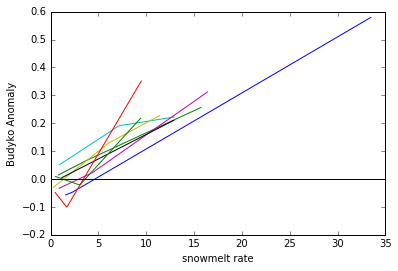

In [101]:
for er in regs:
    brkx = float(er_tab.loc[er_tab.rc == er,'mean_breakx'])
    brky = float(er_tab.loc[er_tab.rc == er,'mean_breaky'])
    k1 = float(er_tab.loc[er_tab.rc == er,'mean_b1'])
    k2 = float(er_tab.loc[er_tab.rc == er,'mean_b2'])
    min_sm = float(er_tab.loc[er_tab.rc == er,'min_snowmelt'])
    max_sm = float(er_tab.loc[er_tab.rc == er,'max_snowmelt'])
    
    X = np.arange(min_sm,max_sm,0.1)
    Y = piecewise_linear(X,brkx,brky,k1,k2)
    plt.plot(X,Y)
    plt.xlabel('snowmelt rate')
    plt.ylabel('Budyko Anomaly')
    plt.axhline(0,c='k')

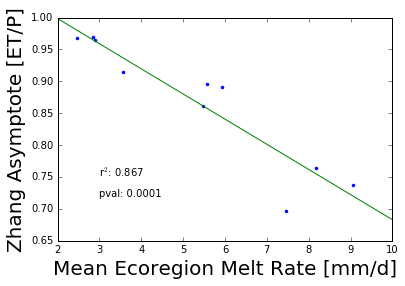

In [102]:
x = np.arange(2,10,0.01)
res = smf.ols('asmpt ~ mean_snowmelt + 1', zhang).fit()

plt.plot(zhang.mean_snowmelt,zhang.asmpt,'.')
plt.plot(x,x*res.params[1]+res.params[0])
plt.xlabel('Mean Ecoregion Melt Rate [mm/d]', fontsize = 20)
plt.ylabel('Zhang Asymptote [ET/P]', fontsize = 20)

plt.text(3,0.75,'r$^2$: '+str(round(res.rsquared,3)))
plt.text(3,0.72,'pval: '+str(round(res.f_pvalue,4)))

## Recreate the manuscript plots

### Figure 3

In [110]:
d['ln_snowmelt'] = np.log(d.snowmelt)

In [115]:
obfx2

,breakx,breaky,b1,b2,r2,rmse,s1,s2,slope_bf_P,intercept_bf_P,lin_r2_bf_P,lin_pval_bf_P
schreiber,10.726300,0.149023,0.017217,0.001319,0.278436,0.079904,0.950108,0.049892,0.422414,-0.049480,0.451128,0
oldekop,5.106147,0.189552,0.041618,0.006192,0.438083,0.081845,0.672722,0.327278,0.552679,0.010242,0.573219,0
turc_pike,7.141202,0.176485,0.028359,0.003493,0.396702,0.079846,0.817295,0.182705,0.516802,-0.020866,0.565407,0
budyko,5.533111,0.130031,0.028725,0.008489,0.353205,0.080090,0.709853,0.290147,0.482380,-0.020177,0.524903,0
myc,NaN,NaN,0.022212,NaN,0.441930,NaN,1.000000,NaN,0.577706,-0.112208,0.661443,0
fuzhang,8.799675,0.135857,0.027755,0.004634,0.474638,0.077567,0.892108,0.107892,0.585351,-0.113799,0.669316,0
zhang,9.422729,0.127869,0.024083,0.004746,0.421537,0.078035,0.915728,0.084272,0.538258,-0.108752,0.615707,0
sharif,8.595562,0.208647,0.039713,0.009194,0.651786,0.077135,0.883651,0.116349,0.803078,-0.133316,0.844397,0
zhou,8.905091,0.157804,0.036379,0.008974,0.622137,0.076968,0.896062,0.103938,0.757851,-0.170253,0.819548,0


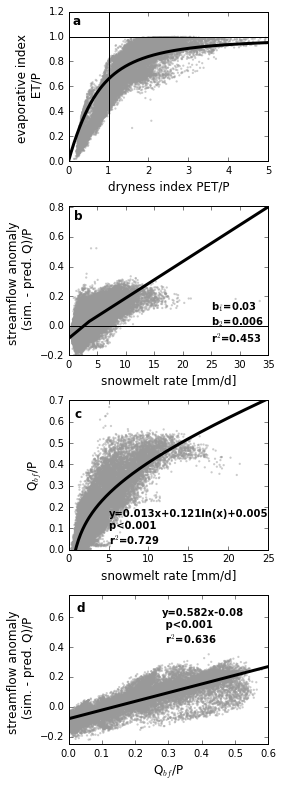

In [134]:
SF = 'Sf'
c='0.6'
rowcol = (1,27)
figsize = (4,11)
s = 5
alpha = 0.5

fontsize = 12
fig = plt.figure(figsize=figsize)


ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

# Budyko Curve and Sf Qanom 

ax1.scatter(d.PET_P,d.ET_P,s = s,c=c, alpha=alpha, edgecolor='none')
ax1.plot(curves.PET_P,mean_bc,'-k', lw=3)
ax1.set_ylabel('evaporative index \n ET/P',fontsize=fontsize)
ax1.set_xlabel('dryness index PET/P', fontsize=fontsize)
ax1.axhline(1,c='k')
ax1.axvline(1,c='k')
ax1.set_xlim(0,5);
ax1.set_ylim(0,1.2);
ax1.annotate('a',[0.1,1.1], fontsize = fontsize, fontweight = 'bold', color='k');

## now Qanom vs Snowmelt rate

p1 = ax2.scatter(d.snowmelt,mean_anom,s = s, c = c, alpha = alpha, edgecolor = 'none');

X = np.arange(d.snowmelt.min(),d.snowmelt.max(),0.1)
y = piecewise_linear(X,np.nanmean(er_tab.mean_breakx),np.nanmean(er_tab.mean_breaky),np.nanmean(er_tab.mean_b1),np.nanmean(er_tab.mean_b2))
p1 = ax2.plot(X,y,'-k', lw = 3)

ax2.set_xlabel('snowmelt rate [mm/d]', fontsize = fontsize);
ax2.set_ylabel('streamflow anomaly \n (sim. - pred. Q)/P', fontsize=fontsize)
ax2.annotate('b',[1,0.72], fontsize = fontsize, fontweight = 'bold',color='k');
ax2.axhline(0,c='k',lw=1)
ax2.set_xlim(0,35)
ax2.set_ylim(-.2,y.max())
eq = 'b$_1$='+str(round(np.nanmean(obfx2.b1),3))+'\nb$_2$='+str(round(np.nanmean(obfx2.b2),3))+'\nr$^2$='+str(round(obfx2.r2.mean(),3))
ax2.text(25,-0.10,eq,fontweight='bold');
#print eq

## Snowmelt rate vs baseflow
xx = 'snowmelt'
yy = 'bf_P'
mod = smf.ols('bf_P ~ snowmelt + ln_snowmelt + 1',d).fit()
#X = d.snowmelt.as_matrix()
#y = d.bf_P.as_matrix()
#p,e = optimize.curve_fit(piecewise_linear,X,y)

xx = np.arange(d.snowmelt.min(),d.snowmelt.max(),0.1)
yy = piecewise_linear(xx,*p)


p2 = ax3.scatter(d.snowmelt,d.bf_P,s = s, c = c, edgecolor = 'none', alpha = alpha)
ax3.set_xlabel('snowmelt rate [mm/d]', fontsize=fontsize)
ax3.set_ylabel('Q$_{bf}$/P', fontsize=fontsize)
ax3.annotate('c',[0.8,0.62], fontsize = fontsize, fontweight = 'bold',color='k');
eq = 'y='+str(round(mod.params.snowmelt,3))+'x+'+str(round(mod.params['ln_snowmelt'],3))+'ln(x)+'+str(round(mod.params.Intercept,3))+'\np<0.001 \nr$^2$='+str(round(mod.rsquared,3))
ax3.text(5,0.03,eq,fontweight='bold');
ax3.set_xlim(0,25)
ax3.set_ylim(0,0.7)
xnew = np.linspace(0.31269355539464155,40,300)
ynew = mod.params['Intercept'] + xnew*mod.params['snowmelt'] + np.log(xnew)*mod.params['ln_snowmelt']
ax3.plot(xnew,ynew,'-k', lw = 3)
#ax3.plot(xx,yy,'-k', lw = 3)

## Baseflow vs Runoff anomaly

X = np.arange(d.bf_P.min(),d.bf_P.max(),0.1)
y = (X*obfx2.slope_bf_P.mean())+obfx2.intercept_bf_P.mean()

p3 = ax4.scatter(d.bf_P,mean_anom,s = s, c = c, edgecolor = 'none', alpha = alpha)
ax4.set_xlabel('Q$_{bf}$/P', fontsize=fontsize)
ax4.set_ylabel('streamflow anomaly \n (sim. - pred. Q)/P', fontsize=fontsize)
eq = 'y='+str(round(obfx2.slope_bf_P.mean(),3))+'x'+str(round(obfx2.intercept_bf_P.mean(),3))+'\n p<0.001 \n r$^{2}$='+str(round(obfx2.lin_r2_bf_P.mean(),3))
ax4.text(0.28,0.43,eq,fontweight='bold');
ax4.set_xlim(0,0.6)
ax4.set_ylim(-0.25,0.75)
ax4.annotate('d',[0.025,0.64], fontsize = fontsize, fontweight = 'bold',color='k');
ax4.plot(X,y,'-k', lw = 3);
fig.tight_layout();
    
#plt.savefig('./figures/GRL_4_pannel_vert_rev1.png', bbox_inches='tight',dpi=300)
#plt.savefig('./figures/comment_4_pannel_vert_rev1.pdf', bbox_inches='tight')

In [45]:
xx = 'snowmelt'
yy = 'bf_P'
mod = smf.ols('bf_P ~ snowmelt + 1',d).fit()

In [46]:
mod.pvalues.snowmelt

0.0

In [47]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   bf_P   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                 4.154e+04
Date:                Mon, 21 Mar 2016   Prob (F-statistic):               0.00
Time:                        11:48:09   Log-Likelihood:                 20850.
No. Observations:               19983   AIC:                        -4.170e+04
Df Residuals:                   19981   BIC:                        -4.168e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0378      0.001     36.658      0.000         0.036     0.040
snowmelt       0.0387      0.000    203.822      0.000         0.038     0.039
==============================================================================
Omnibus:                     2204.098   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19193.422
Skew:                           0.157   Prob(JB):                         0.00
Kurtosis:                       7.791   Cond. No.                         9.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

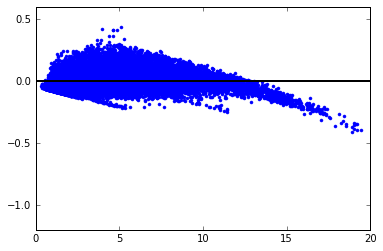

In [48]:
plt.plot(d.snowmelt,mod.resid,'.')
#plt.hexbin(d.snowmelt,mod.resid,gridsize=100)
plt.xlim(0,20)
plt.axhline(0,c='k',lw=2)

In [49]:
residuals = mod.resid

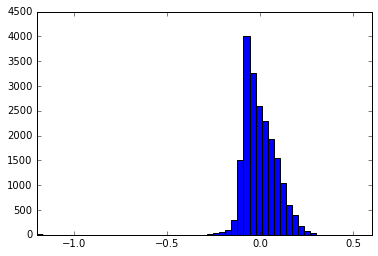

In [50]:
plt.hist(mod.resid.as_matrix(),50);

In [2]:
from scipy import stats as ss

In [3]:
ss.ttest_1samp(mean_anom,0)

NameError: name 'mean_anom' is not defined

### Figure 4

In [135]:
er_tab

,rc,min_r2,mean_r2,max_r2,min_b1,mean_b1,max_b1,min_b2,mean_b2,max_b2,min_breakx,mean_breakx,max_breakx,min_breaky,mean_breaky,max_breaky,min_snowmelt,mean_snowmelt,max_snowmelt
0,1,0.553251,0.722435,0.812094,-0.042121,0.013976,0.022254,0.020081,0.020081,0.020081,2.303200,2.303200,2.303200,-0.046912,-0.046912,-0.046912,1.578520,8.177285,33.504125
1,2,0.011062,0.156120,0.328709,0.003711,0.017840,0.040496,0.009665,0.015877,0.026100,2.352007,3.493433,4.968111,-0.008969,0.062273,0.126002,0.813247,3.575226,15.723258
2,3,0.017262,0.223843,0.569415,0.002798,0.007702,0.014552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.362559,9.065597,35.238598
3,4,0.406836,0.494138,0.601363,0.016909,0.022422,0.033793,-0.002494,0.005403,0.014385,6.725385,7.166786,7.747927,0.159265,0.191045,0.240960,0.920047,5.483745,12.923191
4,6,0.000204,0.164666,0.309492,-0.019371,0.016091,0.091337,0.005209,0.024050,0.035017,0.774014,4.381292,6.737216,-0.044741,0.022895,0.145941,0.899974,5.574560,16.412981
5,7,0.322946,0.493423,0.613803,-0.067793,0.027534,0.052697,0.009281,0.018453,0.047418,0.984553,6.049036,7.907307,-0.152100,0.128473,0.218244,0.312694,2.892802,11.467365
6,8,0.336441,0.514942,0.663235,0.013022,0.238004,1.000000,0.014973,0.017558,0.020144,0.119929,0.144396,0.168864,-0.065020,-0.013334,0.038352,1.181430,7.468346,12.914454
7,9,0.386661,0.518094,0.644407,0.024843,0.032045,0.041653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.043319,5.931484,12.518186
8,12,0.325794,0.463926,0.570095,-0.042986,-0.012012,0.037385,0.021913,0.037656,0.050020,2.217101,3.053536,7.590031,-0.130493,-0.021590,0.252821,0.508790,2.846349,9.458640
9,13,0.496884,0.627825,0.725845,-0.064562,-0.043174,0.045640,0.046170,0.058128,0.070214,1.588000,1.697260,1.801642,-0.175037,-0.101223,-0.011103,0.478671,2.471286,9.508663


In [54]:
#er_tab.to_excel('/Users/barnhatb/Dropbox/CUB/manuscripts/VIC_snowmelt_rate_GRL/submission_2/sm_2_ecoregions_raw.xlsx')

In [140]:
er_tab['region'] = regions # add regions to the data frame

In [143]:
b1s = er_tab.mean_b1.as_matrix()
b2s = er_tab.mean_b2.as_matrix()
#pvals = er_tab.mean_p.as_matrix()
rsqrds = er_tab.mean_r2.as_matrix()
regions = er_tab.region.as_matrix()


# sort everything by slope
b1s2 = [x for (y,x) in sorted(zip(b1s,b1s))] 
b2s2 = [x for (y,x) in sorted(zip(b1s,b2s))]
cbcust3 = [x for (y,x) in sorted(zip(b1s,cbcust2))] # sort the color ramp 
regs2 = [x for (y,x) in sorted(zip(b1s,regs))] # sort the region codes
regions2 = [x for (y,x) in sorted(zip(b1s,regions))] # sort the region names
#pvals2 = [x for (y,x) in sorted(zip(slopes,pvals))] # sort the p values
rsqrds2 = [x for (y,x) in sorted(zip(b1s,rsqrds))] # sort the r squared

#Sfs2 = [x for (y,x) in sorted(zip(slopes,Sfs))] # x values
#mods2 = [x for (y,x) in sorted(zip(slopes,mods))] # y values

# generate titles
names = []
for er,r,s1,s2 in zip(regions2,rsqrds2,b1s2,b2s2):
    
    names.append(er+':\n b$_1$='+str(round(s1,3))+'b$_2$='+str(round(s2,3))+', r$^2$='+str(round(r,3)))

In [150]:
er_tab.mean_snowmelt

0    8.177285
1    3.575226
2    9.065597
3    5.483745
4    5.574560
5    2.892802
6    7.468346
7    5.931484
8    2.846349
9    2.471286
Name: mean_snowmelt, dtype: float64

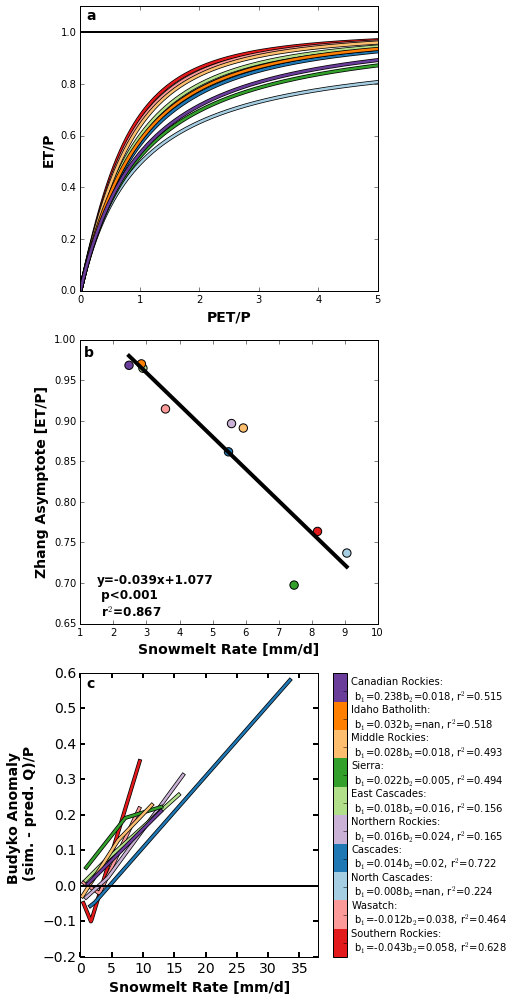

In [153]:
dim = 14.
fig = plt.figure(figsize=(7,dim))
ax1 = fig.add_subplot(313)
ax2 = fig.add_subplot(311)
ax3 = fig.add_subplot(312)

p1 = ax1.scatter(mean_anom,d.snowmelt,s = 0, c = data.rc, alpha = 0.3, edgecolor = 'none', cmap=mpl.colors.ListedColormap(cbcust3));

ct = 0

for er in regs2:
    b1 = float(er_tab.loc[er_tab.rc == er,'mean_b1'])
    b2 = float(er_tab.loc[er_tab.rc == er,'mean_b2'])
    brkx = float(er_tab.loc[er_tab.rc == er,'mean_breakx'])
    brky = float(er_tab.loc[er_tab.rc == er,'mean_breaky'])
    min_sm = float(er_tab.loc[er_tab.rc == er,'min_snowmelt'])
    max_sm = float(er_tab.loc[er_tab.rc == er,'max_snowmelt'])
    
    X = np.arange(min_sm,max_sm,0.1)
    Y = piecewise_linear(X,brkx,brky,b1,b2)
    ax1.plot(X,Y, c='k', lw=4);
    ax1.plot(X,Y, c=cbcust3[ct], lw=2.5);
    ct += 1

ax1.axhline(0,c='k')

ax1.set_xlabel('Snowmelt Rate [mm/d]', fontsize = 14,fontweight = 'bold');
ax1.set_ylabel('Budyko Anomaly \n (sim. - pred. Q)/P', fontsize=14,fontweight = 'bold');

ax1.axhline(0,c='k',lw=2);
ax1.set_xlim(0,38);
ax1.set_ylim(-.2,0.6);
ax1.tick_params(width=2,length=5);
ax1.text(1.0,0.56,'c', fontweight='bold', fontsize=14)

#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_fontsize(14);
#    l.set_fontweight('medium');
    
plt.setp(ax1.get_xticklabels(),fontsize=14,fontweight ='medium');
plt.setp(ax1.get_yticklabels(),fontsize=14, fontweight = 'medium');

# plot the different zhang curves
ct = 0
for er in regs2:
    Y = bc.zhang(X2,zhang.loc[zhang.rc == er,'param'].as_matrix())
    ax2.plot(X2[1]/X2[0],Y,c='k', lw=4)
    ax2.plot(X2[1]/X2[0],Y,c=cbcust3[ct], lw=2.5)
    ct += 1
    
ax2.axhline(1,c='k',lw=2)
ax2.set_ylim(0,1.1)
ax2.set_xlim(0,5)
ax2.set_xlabel('PET/P', fontsize = 14,fontweight = 'bold')
ax2.set_ylabel('ET/P', fontsize = 14,fontweight = 'bold')
ax2.text(0.1,1.05,'a', fontweight='bold', fontsize=14)

# plot the zhang asymptotes vs the average snowmelt rate
x = np.arange(er_tab.mean_snowmelt.min(),er_tab.mean_snowmelt.max(),0.01)
res = smf.ols('asmpt ~ mean_snowmelt + 1', zhang).fit()

ax3.plot(x,x*res.params[1]+res.params[0], c='k',lw=4)
ax3.scatter(zhang.mean_snowmelt,zhang.asmpt,s=70,c=cbcust3)
ax3.set_xlabel('Snowmelt Rate [mm/d]', fontsize = 14,fontweight = 'bold');
ax3.set_ylabel('Zhang Asymptote [ET/P]', fontsize = 14,fontweight = 'bold');
eqn = 'y='+str(round(res.params[1],3))+'x+'+str(round(res.params[0],3))+'\n p<0.001 \n r$^2$='+str(round(res.rsquared,3))
ax3.set_xlim(1,10)
ax3.text(1.5,0.66,eqn,fontweight='bold',fontsize=12)
ax3.text(1.1,0.98,'b', fontweight='bold', fontsize=14)
plt.sca(ax1)
cb=plt.colorbar(p1, spacing='uniform');
strt = 1.6
st = 1.18
cb.set_ticks([strt,strt+st*1,strt+st*2,strt+st*3,strt+st*4,strt+st*5,strt+st*6,strt+st*7,strt+st*8,strt+st*9]);
cb.set_ticklabels(names);
cb.set_alpha(1);
cb.draw_all();

fig.tight_layout()

#plt.savefig('./figures/small2_ecoregions_Qanom_netSnowmelt_rev1.png',bbox_inches='tight',dpi=300)
#plt.savefig('./figures/small2_ecoregions_Qanom_netSnowmelt_rev1.pdf',bbox_inches='tight')

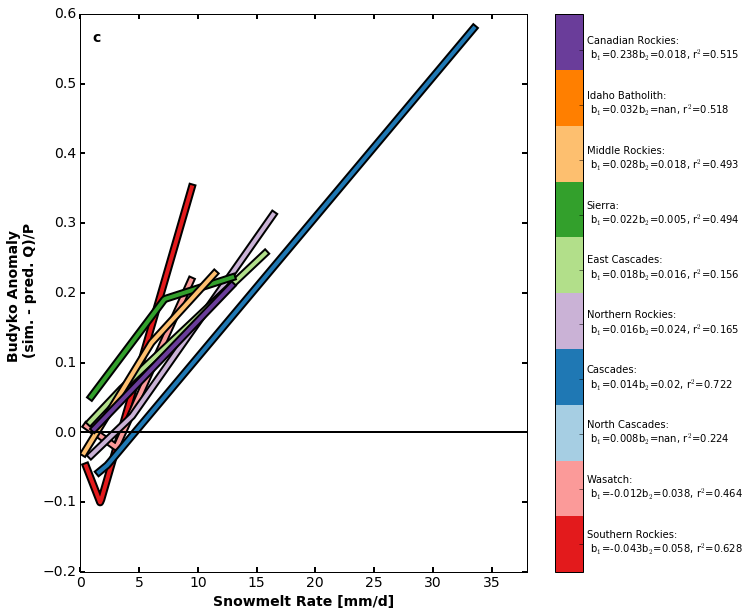

In [159]:
fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(111)
ct = 0

for er in regs2:
    b1 = float(er_tab.loc[er_tab.rc == er,'mean_b1'])
    b2 = float(er_tab.loc[er_tab.rc == er,'mean_b2'])
    brkx = float(er_tab.loc[er_tab.rc == er,'mean_breakx'])
    brky = float(er_tab.loc[er_tab.rc == er,'mean_breaky'])
    min_sm = float(er_tab.loc[er_tab.rc == er,'min_snowmelt'])
    max_sm = float(er_tab.loc[er_tab.rc == er,'max_snowmelt'])
    
    X = np.arange(min_sm,max_sm,0.1)
    Y = piecewise_linear(X,brkx,brky,b1,b2)
    ax1.plot(X,Y, c='k', lw=8);
    ax1.plot(X,Y, c=cbcust3[ct], lw=4);
    ct += 1

ax1.axhline(0,c='k')

ax1.set_xlabel('Snowmelt Rate [mm/d]', fontsize = 14,fontweight = 'bold');
ax1.set_ylabel('Budyko Anomaly \n (sim. - pred. Q)/P', fontsize=14,fontweight = 'bold');

ax1.axhline(0,c='k',lw=2);
ax1.set_xlim(0,38);
ax1.set_ylim(-.2,0.6);
ax1.tick_params(width=2,length=5);
ax1.text(1.0,0.56,'c', fontweight='bold', fontsize=14)

#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_fontsize(14);
#    l.set_fontweight('medium');
    
plt.setp(ax1.get_xticklabels(),fontsize=14,fontweight ='medium');
plt.setp(ax1.get_yticklabels(),fontsize=14, fontweight = 'medium');

cb=plt.colorbar(p1, spacing='uniform');
strt = 1.6
st = 1.18
cb.set_ticks([strt,strt+st*1,strt+st*2,strt+st*3,strt+st*4,strt+st*5,strt+st*6,strt+st*7,strt+st*8,strt+st*9]);
cb.set_ticklabels(names);
cb.set_alpha(1);
cb.draw_all();


In [171]:
er_tab.sort_values(by='mean_b1',ascending=False)[['mean_b1','mean_b2','region']]

,mean_b1,mean_b2,region
6,0.238004,0.017558,Canadian Rockies
7,0.032045,NaN,Idaho Batholith
5,0.027534,0.018453,Middle Rockies
3,0.022422,0.005403,Sierra
1,0.017840,0.015877,East Cascades
4,0.016091,0.024050,Northern Rockies
0,0.013976,0.020081,Cascades
2,0.007702,NaN,North Cascades
8,-0.012012,0.037656,Wasatch
9,-0.043174,0.058128,Southern Rockies


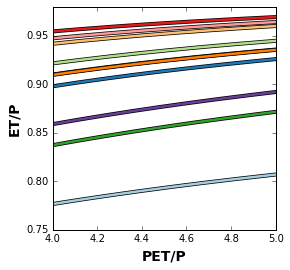

In [62]:
fig = plt.figure(figsize=(4,4))
ax2 = fig.add_subplot(111)
# plot the different zhang curves
ct = 0
for er in regs2:
    Y = bc.zhang(X2,er_fits.loc[er_fits.rc == er,'zhang'].as_matrix())
    ax2.plot(X2[1]/X2[0],Y,c='k', lw=4)
    ax2.plot(X2[1]/X2[0],Y,c=cbcust3[ct], lw=2.5)
    ct += 1
    
ax2.set_ylim(0.75,0.98)
ax2.set_xlim(4,5)
ax2.set_xlabel('PET/P', fontsize = 14,fontweight = 'bold')
ax2.set_ylabel('ET/P', fontsize = 14,fontweight = 'bold')

In [ ]:
for c,n in zip(cbcust3,regions2):
    print '%s: %s,%s,%s'%(n,round(c[0]*255.,0),round(c[1]*255.,0),round(c[2]*255.,0))111

## from matplotlib import colors

In [113]:
mean_anom.max()

0.52381077339529558

In [ ]:
len(X2[1])

In [ ]:
X2[0]/X2[1]

In [ ]:
d['mean_Qanom_P'] = mean_anom # add the mean anomaly

In [ ]:
sm_min = d.snowmelt.min()
sm_max = d.snowmelt.max()
st = 0.5
sms = np.arange(sm_min,sm_max+st+st,st)

In [ ]:
d.loc[(d.snowmelt<sms[num]+(st/2.))&(d.snowmelt>=sms[num]-(st/2.)),'mean_Qanom_P'].mean()

In [ ]:
a = []
sd = []
for sm in sms:
    a.append(d.loc[(d.snowmelt<sm+(st/2.))&(d.snowmelt>=sm-(st/2.)),'mean_Qanom_P'].mean())
    sd.append(d.loc[(d.snowmelt<sm+(st/2.))&(d.snowmelt>=sm-(st/2.)),'mean_Qanom_P'].std())

In [ ]:
plt.errorbar(sms,a,yerr=sd)

In [ ]:
def ispositive(array):
    # 0 == negative
    # 1 == positive
    # 3 == nan
    
    n = len(array)
    out = np.empty(n)
    ct = 0
    for a in array:
        if  a - np.abs(a) < 0:
            out[ct] = 0 # set negative
            ct += 1
            continue
        elif np.isnan(a):
            out[ct] = 3 # set nan
            ct += 1
            continue
        elif a-np.abs(a) >= 0:
            out[ct] = 1
            ct += 1
    return out

In [ ]:
test = np.array(a)-2.*np.array(sd)

In [ ]:
sms[ispositive(test)==1][0]

In [ ]:
np.empty(5)